In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df= pd.read_csv('ushape.csv')

In [34]:
df

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0
...,...,...,...
94,1.699453,0.587720,1.0
95,0.218623,-0.652521,1.0
96,0.952914,-0.419766,1.0
97,-1.318500,0.423112,0.0


In [35]:
df.rename({'3.159499363321345566e-02':'X', '9.869877579082642072e-01':'Y', '0.000000000000000000e+00':'class'}, axis=1, inplace=True)
df

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0
...,...,...,...
94,1.699453,0.587720,1.0
95,0.218623,-0.652521,1.0
96,0.952914,-0.419766,1.0
97,-1.318500,0.423112,0.0


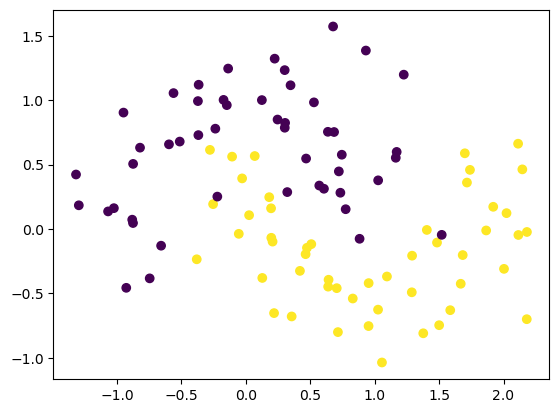

In [36]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [37]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [38]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

# ReLU

In [39]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
# Set parameters to 0
model.get_weights()

[array([[-0.21467102,  1.0379831 ],
        [ 1.1268429 , -0.68592894]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.5111037],
        [-0.4415887]], dtype=float32),
 array([0.], dtype=float32)]

In [41]:
initial_weights = model.get_weights()

In [42]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [43]:
model.set_weights(initial_weights)

In [44]:
model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [45]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [46]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 80ms/step - loss: 0.9214 - accuracy: 0.5063 - val_loss: 0.8203 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 21ms/step - loss: 0.9176 - accuracy: 0.5063 - val_loss: 0.8175 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 25ms/step - loss: 0.9135 - accuracy: 0.5063 - val_loss: 0.8147 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 22ms/step - loss: 0.9093 - accuracy: 0.5063 - val_loss: 0.8119 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 0.9060 - accuracy: 0.5063 - val_loss: 0.8091 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 31ms/step - loss: 0.9015 - accuracy: 0.5063 - val_loss: 0.8065 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 27ms/step - loss: 0.8979 - accuracy: 0.5063 - val_loss: 0.8038 - val_accuracy: 0.5000
Epoch 8/100
3/3 [===

In [47]:
model.get_weights()

[array([[0.5298215 , 0.5298215 ],
        [0.25374994, 0.25374994]], dtype=float32),
 array([0.30442423, 0.30442423], dtype=float32),
 array([[0.29187807],
        [0.29187807]], dtype=float32),
 array([0.25273272], dtype=float32)]

9600/9600 [==============================] - 17s 2ms/step


C:\Users\Md. Masbahul Bari\AppData\Roaming\Python\Python39\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot:>

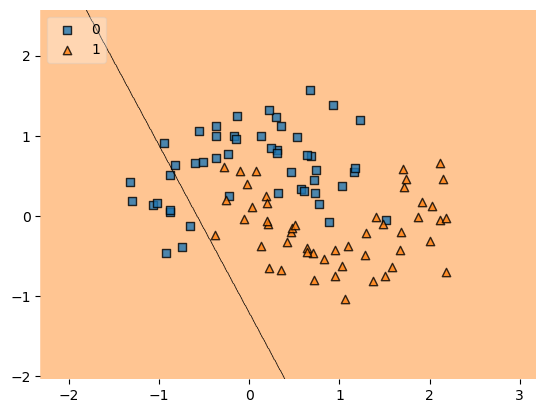

In [48]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

# tanh

In [49]:
model = Sequential()

model.add(Dense(2,activation='tanh',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 6         
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
# Set parameters to 0
model.get_weights()

[array([[-1.0309838 , -0.99827874],
        [ 0.4170071 , -1.2123708 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.22389245],
        [ 1.2388219 ]], dtype=float32),
 array([0.], dtype=float32)]

In [51]:
initial_weights = model.get_weights()

In [52]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [53]:
model.set_weights(initial_weights)

In [54]:
model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [55]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [56]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 70ms/step - loss: 0.8441 - accuracy: 0.5063 - val_loss: 0.7755 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 0.8416 - accuracy: 0.5063 - val_loss: 0.7730 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 24ms/step - loss: 0.8390 - accuracy: 0.5063 - val_loss: 0.7705 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 0.8367 - accuracy: 0.5063 - val_loss: 0.7681 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 0.8340 - accuracy: 0.5063 - val_loss: 0.7657 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 22ms/step - loss: 0.8317 - accuracy: 0.5063 - val_loss: 0.7633 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 19ms/step - loss: 0.8296 - accuracy: 0.5063 - val_loss: 0.7610 - val_accuracy: 0.5000
Epoch 8/100
3/3 [===

In [57]:
model.get_weights()

[array([[0.7060477 , 0.7060477 ],
        [0.22364938, 0.22364938]], dtype=float32),
 array([0.26094544, 0.26094544], dtype=float32),
 array([[0.3000349],
        [0.3000349]], dtype=float32),
 array([0.25587934], dtype=float32)]

9600/9600 [==============================] - 17s 2ms/step


<AxesSubplot:>

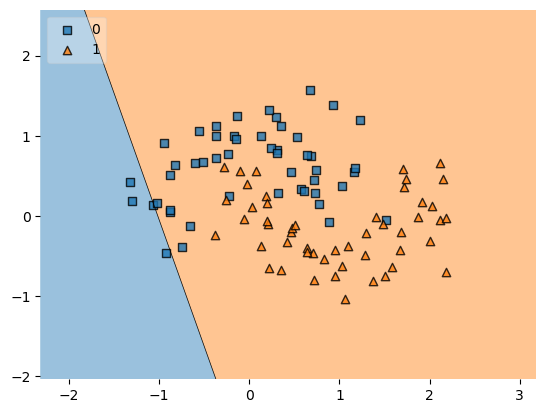

In [58]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)